In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/liuyichen/Desktop/fma4200/project/edit_final_transactions_dataset.csv')

Company: 1
Start Date: 2013-10-10 00:00:00, End Date: 2018-10-09 00:00:00
Trading dates are not continuous.
Yearly Transaction Count:
date_BUY_fix
2013     676
2014    3081
2015    3222
2016    3180
2017    3215
2018    2505
dtype: int64

Company: 2
Start Date: 2013-10-10 00:00:00, End Date: 2018-10-09 00:00:00
Trading dates are not continuous.
Yearly Transaction Count:
date_BUY_fix
2013     699
2014    3302
2015    3262
2016    3169
2017    3189
2018    2649
dtype: int64

Company: 3
Start Date: 2013-10-10 00:00:00, End Date: 2018-10-09 00:00:00
Trading dates are not continuous.
Yearly Transaction Count:
date_BUY_fix
2013     722
2014    3257
2015    3161
2016    3175
2017    3148
2018    2492
dtype: int64

Company: 4
Start Date: 2013-10-10 00:00:00, End Date: 2018-10-09 00:00:00
Trading dates are not continuous.
Yearly Transaction Count:
date_BUY_fix
2013     678
2014    3211
2015    3225
2016    3220
2017    3151
2018    2616
dtype: int64

Company: 5
Start Date: 2013-10-10 00:00:00, 

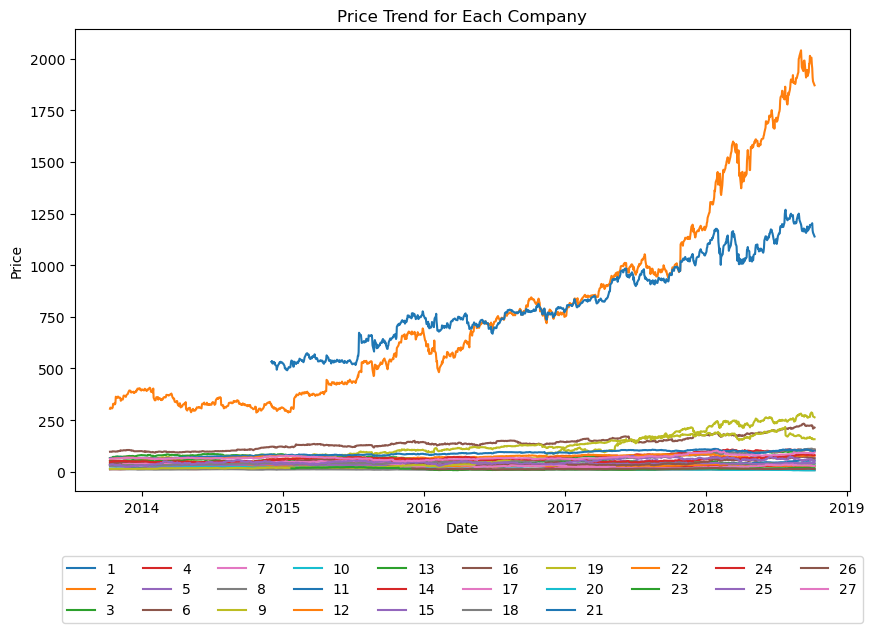

In [9]:
### Sort the time series observations
data['date_BUY_fix'] = pd.to_datetime(data['date_BUY_fix'])
data['date_SELL_fix'] = pd.to_datetime(data['date_SELL_fix'])
grouped = data.groupby('company')
sorted_data = []
fig, ax = plt.subplots(figsize=(10, 6))

for company, group in grouped:
    print(f"Company: {company}")
    # Get the transaction date column and sort it in ascending order
    group.sort_values(by=['date_BUY_fix', 'date_SELL_fix'], inplace=True)
    sorted_data.append(group)
    
    ax.plot(group['date_BUY_fix'], group['price_BUY'], label=company)

    # Showing the start and end dates of transactions for each company
    start_date = group['date_BUY_fix'].min()
    end_date = group['date_BUY_fix'].max()
    print(f"Start Date: {start_date}, End Date: {end_date}")    
    
    # Check whether the buying price and other informations is same for the same day same company.
    # Check whether the dates are consecutive.
    dates = group['date_BUY_fix'].sort_values()
    is_continuous = True
    prev_date = None
    for date in dates:
        if prev_date is not None:
            if (date - prev_date).days > 1:
                is_continuous = False
                break
        prev_date = date
    
    if is_continuous:
        print("Trading dates are continuous.")
    else:
        print("Trading dates are not continuous.")   
    
    # Showing the number of transactions for each firm for each year
    yearly_transaction_count = group.groupby(group['date_BUY_fix'].dt.year).size()
    print("Yearly Transaction Count:")
    print(yearly_transaction_count)
    print()   

sorted_data_df = pd.concat(sorted_data)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trend for Each Company')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=10)

plt.show()

In [10]:
sorted_data_df

,company,sector,horizon..days.,amount,date_BUY_fix,date_SELL_fix,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,...,investment,ESG_ranking,PE_ratio,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
45588,1,5,15,20000,2013-10-10,2013-10-25,15.511027,16.661591,0.323365,0.317022,...,1,16.5,10.67,1.42,2.32,3.08,21.67,1.68,18.57,29.06
17135,1,5,30,200,2013-10-10,2013-11-08,15.511027,16.586802,0.323365,0.311869,...,1,16.5,10.67,1.42,2.32,3.08,21.67,1.68,18.57,29.06
262837,1,5,40,2000,2013-10-10,2013-11-19,15.511027,16.554625,0.323365,0.303038,...,1,16.5,10.67,1.42,2.32,3.08,21.67,1.68,18.57,29.06
232571,1,5,4,5000,2013-10-11,2013-10-15,15.611448,15.797400,0.323442,0.322893,...,1,16.5,10.67,1.42,2.32,3.08,21.67,1.68,18.57,29.06
359747,1,5,6,200,2013-10-11,2013-10-17,15.611448,15.981767,0.323442,0.322894,...,1,16.5,10.67,1.42,2.32,3.08,21.67,1.68,18.57,29.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394567,27,4,180,300,2018-10-09,2019-04-08,93.082619,96.178032,0.247014,0.195426,...,1,27.3,55.25,1.74,0.56,3.52,1.01,0.81,2.45,6.60
93879,27,4,270,1000,2018-10-09,2019-07-05,93.082619,109.112450,0.247014,0.186011,...,1,27.3,55.25,1.74,0.56,3.52,1.01,0.81,2.45,6.60
93672,27,4,300,3000,2018-10-09,2019-08-05,93.082619,103.110184,0.247014,0.188559,...,1,27.3,55.25,1.74,0.56,3.52,1.01,0.81,2.45,6.60
270060,27,4,360,4000,2018-10-09,2019-10-04,93.082619,115.700928,0.247014,0.178759,...,1,27.3,55.25,1.74,0.56,3.52,1.01,0.81,2.45,6.60


# Findings:
1. Most companies' buying starting date is 2013-10-10, however, company 23's selling started at 2015-01-23, and company 26 started at 2015-12-02.
2. The selling dates are not continuous during the dates for every companies: trading is not allowed on weekends and holidays.
3. Most companies buying prices are stable under 250 with a slight increasing. Company 2 and Company 23's prices increase significantly from 250 to 1000.

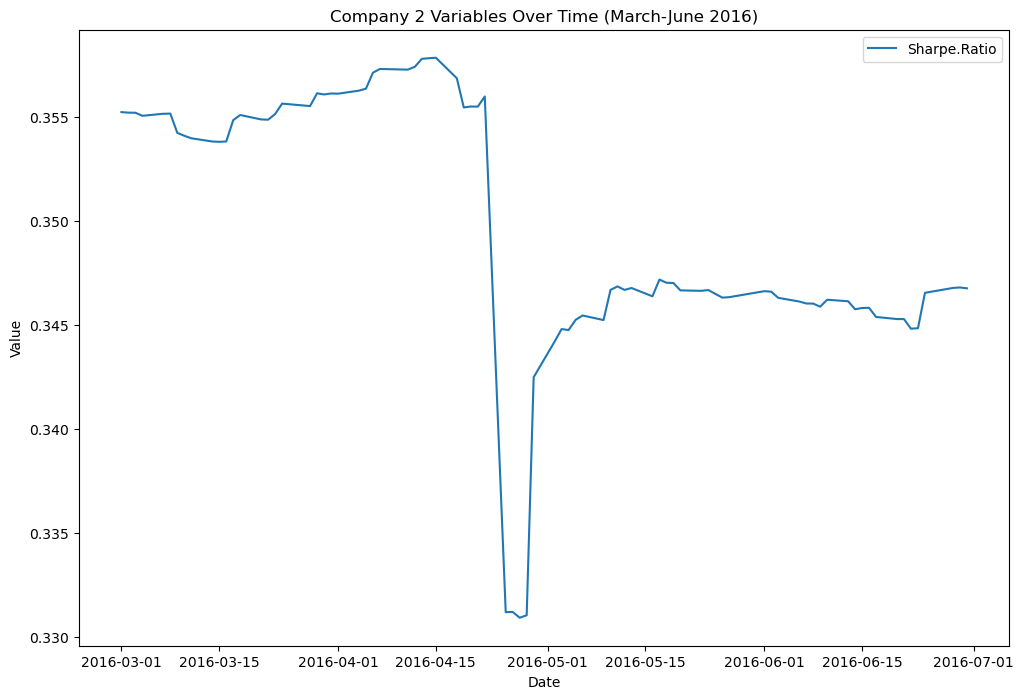

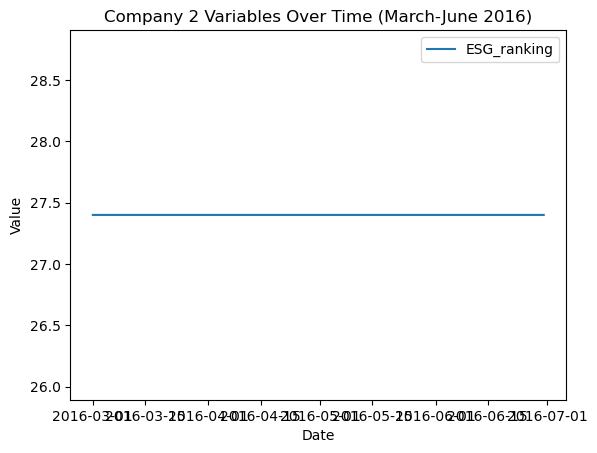

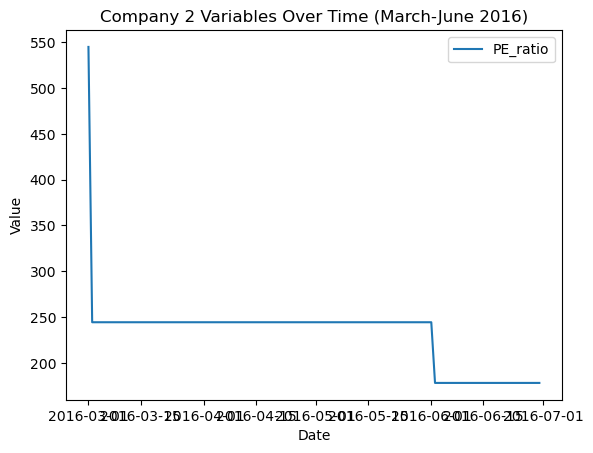

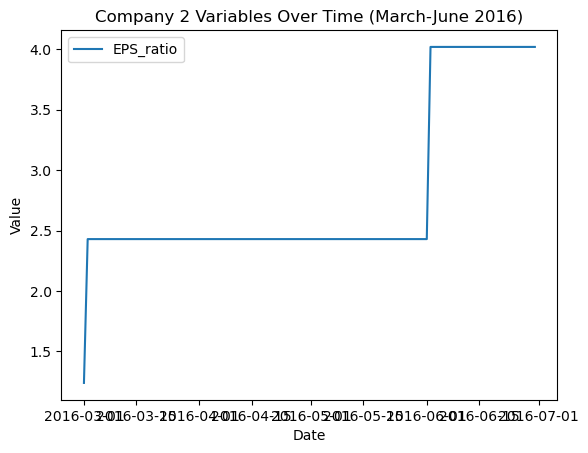

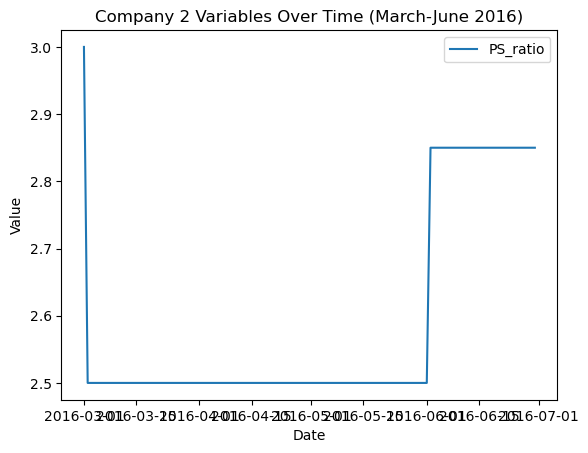

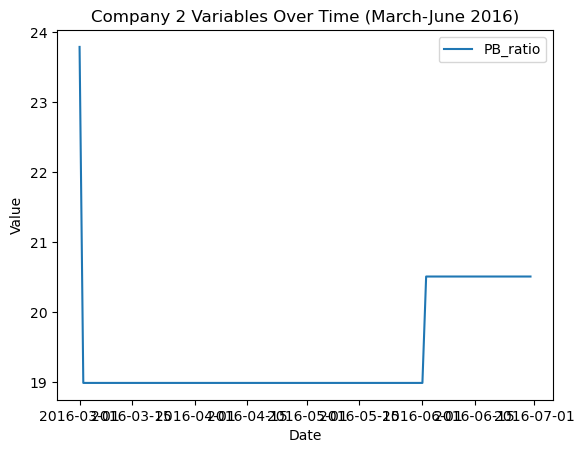

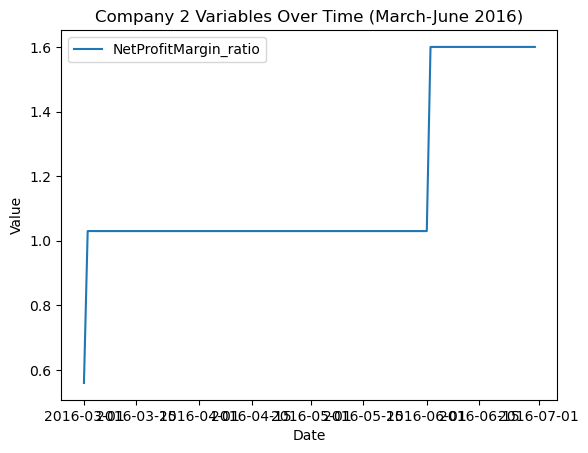

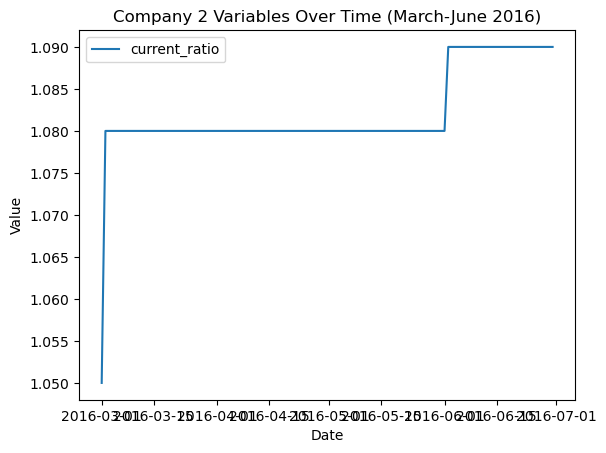

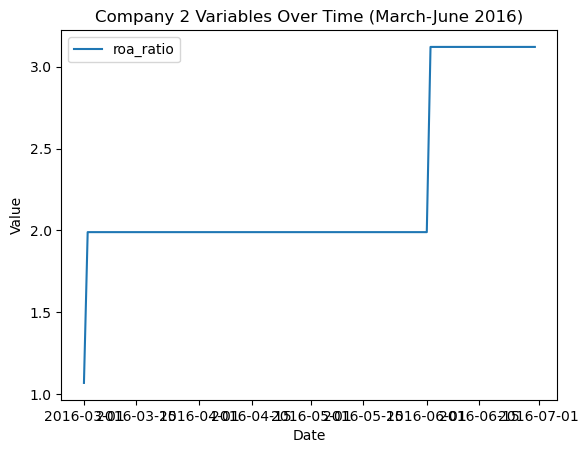

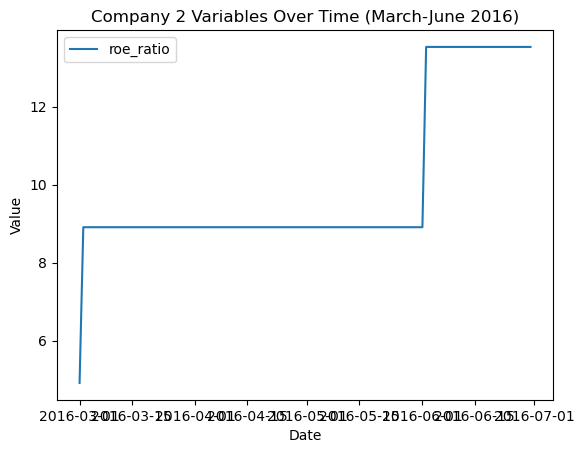

In [14]:
### Examine how the variables change over time
# Filter out the data except for the company numbered 23 and restrict the time range to two months
grouped = sorted_data_df.groupby('company')
company_2 = grouped.get_group(2)
start_date = pd.Timestamp('2016-03-01')
end_date = pd.Timestamp('2016-06-30')
company_2 = company_2[(company_2['date_BUY_fix'] >= start_date) & (company_2['date_BUY_fix'] <= end_date)]

# List of the variable
variables = ['Sharpe.Ratio', 'ESG_ranking', 'PE_ratio', 'EPS_ratio', 'PS_ratio', 'PB_ratio', 'NetProfitMargin_ratio', 'current_ratio', 'roa_ratio', 'roe_ratio']

plt.figure(figsize=(12, 8))
for variable in variables:
    plt.plot(company_2['date_BUY_fix'], company_2[variable], label=variable)

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Company 2 Variables Over Time (March-June 2016)')

    plt.legend()
    plt.show()


# Findings:
Only Sharpe.Ratio fluctuates over time, ESG doesn't change during the dates, others variables remain stable in one month and change over in the next month.

In [17]:
### Determine whether the time series is stationary
from statsmodels.tsa.stattools import adfuller

# Unit root test (ADF)
def adf_test(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])


for company, group in grouped:
    print(f"Company: {company}")
    
    variables = ['Sharpe.Ratio', 'price_BUY']
    for variable in variables:
        print(f"Variable: {variable}")
        adf_test(group[variable])
        print()

Company: 1
Variable: Sharpe.Ratio
ADF Statistic: -2.8162528124671606
p-value: 0.055989411669280315

Variable: price_BUY
ADF Statistic: 0.672436109900629
p-value: 0.98927142331536

Company: 2
Variable: Sharpe.Ratio
ADF Statistic: -0.817128246335034
p-value: 0.8140389276803736

Variable: price_BUY
ADF Statistic: 1.6420825730926365
p-value: 0.9979784930528716

Company: 3
Variable: Sharpe.Ratio
ADF Statistic: -1.2473978535978765
p-value: 0.6528814982289705

Variable: price_BUY
ADF Statistic: -0.6122187805723569
p-value: 0.8681971114471062

Company: 4
Variable: Sharpe.Ratio
ADF Statistic: -0.8781029679243123
p-value: 0.7950978776971256

Variable: price_BUY
ADF Statistic: -0.2871289587914142
p-value: 0.9273075784686199

Company: 5
Variable: Sharpe.Ratio
ADF Statistic: -1.8161632050875256
p-value: 0.3724671493208065

Variable: price_BUY
ADF Statistic: -0.30248176346327565
p-value: 0.9251521040364657

Company: 6
Variable: Sharpe.Ratio
ADF Statistic: -1.1923403573276417
p-value: 0.6768819869323

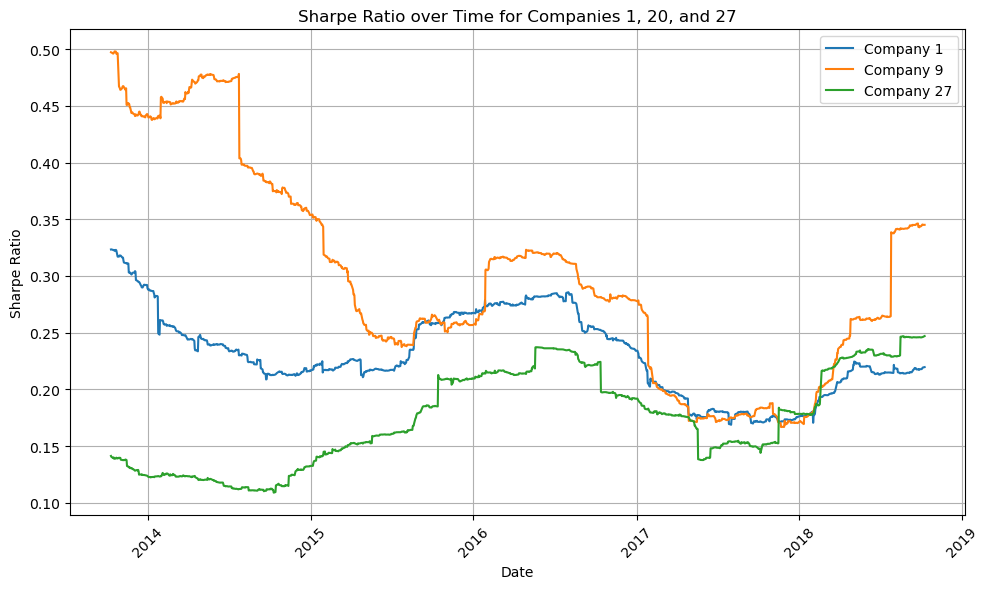

In [26]:
company_1_data = grouped.get_group(1) # p-value: 0.0559
company_2_data = grouped.get_group(9) # p-value: 0.2029
company_3_data = grouped.get_group(27) # p-value: 0.9353

# 绘制 'Sharpe.Ratio' 随时间的变化折线图
plt.figure(figsize=(10, 6))

plt.plot(company_1_data['date_BUY_fix'], company_1_data['Sharpe.Ratio'], label='Company 1')
plt.plot(company_2_data['date_BUY_fix'], company_2_data['Sharpe.Ratio'], label='Company 9')
plt.plot(company_3_data['date_BUY_fix'], company_3_data['Sharpe.Ratio'], label='Company 27')

plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio over Time for Companies 1, 20, and 27')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Unstable:
Only Company 1's Sharpe.Ratio is stable with 5% significant level.

In [27]:
sorted_data_df.to_csv('/Users/liuyichen/Desktop/fma4200/project/sorted_final_transactions_dataset.csv', index=False)